<a href="https://colab.research.google.com/github/jennylin3-droid/504_serverless_functions/blob/main/NHANES_inferential_2023_HW2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scipy statsmodels seaborn matplotlib


In [3]:
import pandas as pd

# Demographic data for Martial Status, Education Level, and Age in Years
df = pd.read_sas('/content/sample_data/DATA sets/DEMO.xpt', format='xport')

# Look at first few rows
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [4]:
df.columns


Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4',
       'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND',
       'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR',
       'SDMVSTRA', 'SDMVPSU', 'INDFMPIR'],
      dtype='object')

Marital Status (DMDMARTZ)
Education Level (DMDEDUC2)
Age in Years (RIDAGEYR)

In [12]:
###Marital Status

import numpy as np

# 1=Married, 2=Widowed, 3=Divorced, 4=Separated, 5=Never married, 6=Living with partner
def recode_marital(x):
    if x in [1, 6]:
        return 'married'
    elif x in [2, 3, 4, 5]:
        return 'not_married'
    else:
        return np.nan

df['married_binary'] = df['DMDMARTZ'].apply(recode_marital)

In [13]:
###Education Level
# 1=<9th grade, 2=9–11th grade, 3=HS/GED, 4=Some college/AA, 5=College graduate or above
def recode_edu(x):
    if x == 5:
        return 'bachelors_or_higher'
    elif x in [1, 2, 3, 4]:
        return 'less_than_bachelors'
    else:
        return np.nan

df['edu_bachelors'] = df['DMDEDUC2'].apply(recode_edu)

In [14]:
print("\n📊 Marital Status (recoded):")
print(df['married_binary'].value_counts(dropna=False))

print("\n📊 Education Level (recoded):")
print(df['edu_bachelors'].value_counts(dropna=False))

# 7️⃣ Basic stats for age
print("\n📈 Age Summary (RIDAGEYR):")
print(df['RIDAGEYR'].describe())

# 8️⃣ Save cleaned demographics to a new file (optional)
df.to_csv('/content/nhanes_demographics_clean.csv', index=False)
print("\n💾 Saved cleaned demographics to nhanes_demographics_clean.csv")


📊 Marital Status (recoded):
married_binary
NaN            4150
married        4136
not_married    3647
Name: count, dtype: int64

📊 Education Level (recoded):
edu_bachelors
less_than_bachelors    5158
NaN                    4150
bachelors_or_higher    2625
Name: count, dtype: int64

📈 Age Summary (RIDAGEYR):
count    1.193300e+04
mean     3.831786e+01
std      2.560199e+01
min      5.397605e-79
25%      1.300000e+01
50%      3.700000e+01
75%      6.200000e+01
max      8.000000e+01
Name: RIDAGEYR, dtype: float64

💾 Saved cleaned demographics to nhanes_demographics_clean.csv



📈 Age Summary Statistics (RIDAGEYR):
count    1.193300e+04
mean     3.831786e+01
std      2.560199e+01
min      5.397605e-79
25%      1.300000e+01
50%      3.700000e+01
75%      6.200000e+01
max      8.000000e+01
Name: RIDAGEYR, dtype: float64


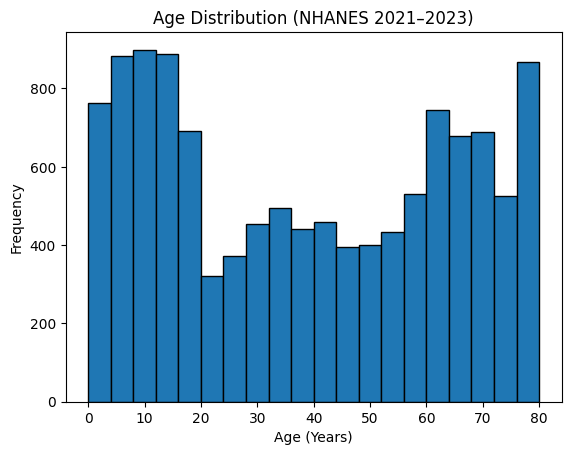

In [16]:
import matplotlib.pyplot as plt

print("\n📈 Age Summary Statistics (RIDAGEYR):")
print(df['RIDAGEYR'].describe())

plt.hist(df['RIDAGEYR'], bins=20, edgecolor='black')
plt.title('Age Distribution (NHANES 2021–2023)')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

**Question 1:** "Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?"

Variables: DMDMARTZ (marital status) and DMDEDUC2 (education level). Recode as specified.

📊 Contingency Table:
edu_bachelors   bachelors_or_higher  less_than_bachelors
married_binary                                          
married                        1631                 2503
not_married                     990                 2648

🧪 Chi-Square Test Results:
Chi2 Statistic = 129.174
Degrees of Freedom = 1
P-value = 0.0000
✅ There is a statistically significant association between marital status and education level.


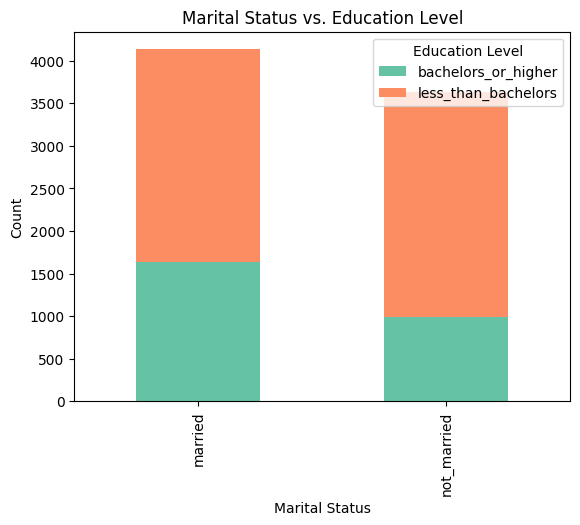

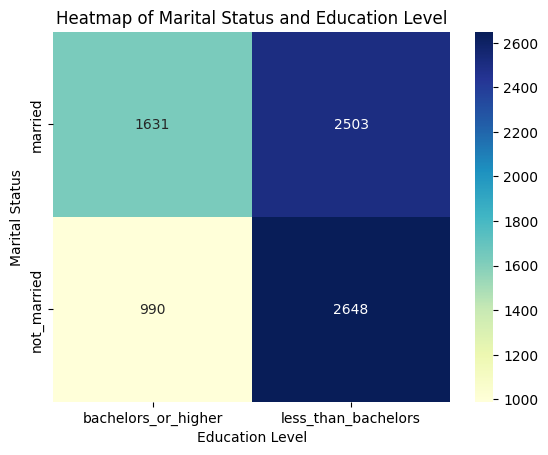

In [18]:
# === Question 1: Association between Marital Status and Education Level ===

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1️⃣ Load the cleaned demographics file (from the previous step)
df = pd.read_csv('/content/nhanes_demographics_clean.csv')

# 2️⃣ Drop missing values in our two variables (important for chi-square)
subset = df[['married_binary', 'edu_bachelors']].dropna()

# 3️⃣ Create a contingency table
contingency_table = pd.crosstab(subset['married_binary'], subset['edu_bachelors'])
print("📊 Contingency Table:")
print(contingency_table)

# 4️⃣ Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n🧪 Chi-Square Test Results:")
print(f"Chi2 Statistic = {chi2:.3f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

# 5️⃣ Interpret Results
if p < 0.05:
    print("✅ There is a statistically significant association between marital status and education level.")
else:
    print("❌ No statistically significant association between marital status and education level.")

# 6️⃣ Visualization 1: Stacked bar chart
contingency_table.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])
plt.title('Marital Status vs. Education Level')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()

# 7️⃣ Visualization 2: Heatmap (optional)
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Marital Status and Education Level')
plt.xlabel('Education Level')
plt.ylabel('Marital Status')
plt.show()


There is a correlation between Marital status and Education Level. The bar graph presented higher counts of Married couples have higher educational level.

Question 2: "Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?"

Variables: DMDMARTZ (marital status, recoded) and PAD680 (sedentary behavior time, cleaned).

✅ Cleaned sedentary data sample:


,SEQN,PAD680
0,130378.0,360.0
1,130379.0,480.0
2,130380.0,240.0
3,130384.0,60.0
4,130385.0,180.0



📊 Mean sedentary time (minutes):
married_binary
married        353.287141
not_married    371.957535
Name: PAD680, dtype: float64

🧪 T-Test Results:
T-statistic = -3.851
P-value = 0.0001
✅ There is a statistically significant difference in mean sedentary behavior between married and not married participants.


/tmp/ipython-input-10377813.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='married_binary', y='PAD680', palette='Set2')


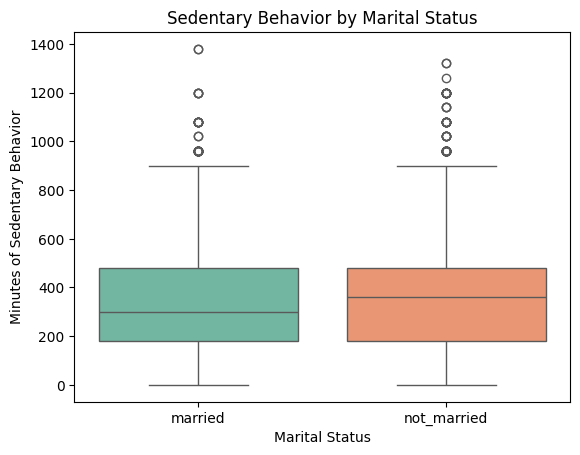

/tmp/ipython-input-10377813.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_merged, x='married_binary', y='PAD680', ci='sd', palette='pastel')
/tmp/ipython-input-10377813.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merged, x='married_binary', y='PAD680', ci='sd', palette='pastel')


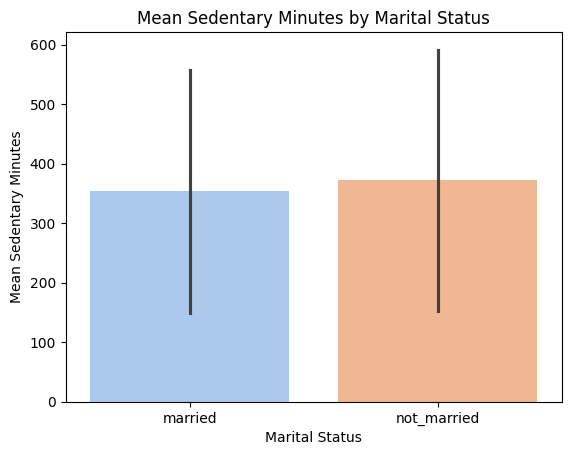

In [40]:
# === Question 2: Difference in Mean Sedentary Behavior by Marital Status ===

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Load your sedentary behavior data
df_sedentary_raw = pd.read_sas('/content/sample_data/DATA sets/Sedentary.xpt', format='xport')

# 2️⃣ Keep only the needed variable
df_sedentary = df_sedentary_raw[['SEQN', 'PAD680']]  # SEQN is the unique participant ID

# 3️⃣ Clean placeholder values: 7777, 9999, or missing
df_sedentary = df_sedentary.replace([7777, 9999], np.nan)
df_sedentary = df_sedentary.dropna(subset=['PAD680'])

print("✅ Cleaned sedentary data sample:")
display(df_sedentary.head())

# 4️⃣ Load your cleaned demographics file (with marital status)
df_demo = pd.read_csv('/content/nhanes_demographics_clean.csv')

# 5️⃣ Merge the two on SEQN (NHANES participant ID)
df_merged = pd.merge(df_demo, df_sedentary, on='SEQN', how='inner')

# 6️⃣ Drop rows with missing marital status
df_merged = df_merged.dropna(subset=['married_binary'])

# 7️⃣ Check group means
group_means = df_merged.groupby('married_binary')['PAD680'].mean()
print("\n📊 Mean sedentary time (minutes):")
print(group_means)

# 8️⃣ Independent samples t-test
married_group = df_merged[df_merged['married_binary'] == 'married']['PAD680']
not_married_group = df_merged[df_merged['married_binary'] == 'not_married']['PAD680']

t_stat, p_value = ttest_ind(married_group, not_married_group, equal_var=False)  # Welch’s t-test

print("\n🧪 T-Test Results:")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value = {p_value:.4f}")

# 9️⃣ Interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant difference in mean sedentary behavior between married and not married participants.")
else:
    print("❌ No statistically significant difference in mean sedentary behavior between groups.")

# 🔟 Visualization 1: Boxplot
sns.boxplot(data=df_merged, x='married_binary', y='PAD680', palette='Set2')
plt.title('Sedentary Behavior by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Minutes of Sedentary Behavior')
plt.show()

# 🔟 Visualization 2: Bar plot with error bars
sns.barplot(data=df_merged, x='married_binary', y='PAD680', ci='sd', palette='pastel')
plt.title('Mean Sedentary Minutes by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Sedentary Minutes')
plt.show()

Unmarried have higher mediaan of sedentary behavior than those who are married.

Question 3: "How do age and marital status affect systolic blood pressure?"

Variables: RIDAGEYR (age), DMDMARTZ (marital status, recoded), and BPXOSY3 (systolic blood pressure).

In [36]:
bp = pd.read_sas('/content/sample_data/DATA sets/BP.xpt', format='xport')
demo = pd.read_sas('/content/sample_data/DATA sets/DEMO.xpt', format='xport')

print("BP shape:", bp.shape)
print("DEMO shape:", demo.shape)

# Merge them on SEQN (participant ID)
df = pd.merge(demo, bp, on='SEQN', how='inner')

print("Merged shape:", df.shape)
df.head()

BP shape: (7801, 12)
DEMO shape: (11933, 27)
Merged shape: (7801, 38)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,12.0,2.0,1.0,34.0,NaN,1.0,1.0,1.0,NaN,...,4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,12.0,2.0,2.0,68.0,NaN,3.0,3.0,2.0,NaN,...,4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0


                            OLS Regression Results                            
Dep. Variable:                BPXOSY3   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     453.3
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          1.00e-183
Time:                        00:54:27   Log-Likelihood:                -24856.
No. Observations:                5838   AIC:                         4.972e+04
Df Residuals:                    5835   BIC:                         4.974e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        102.1600      0.764    133.

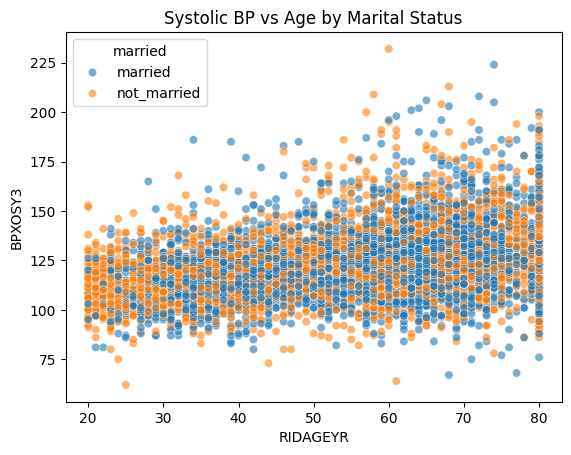

In [39]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Load blood pressure data
df_bp_raw = pd.read_sas('/content/sample_data/DATA sets/BP.xpt', format='xport')
df_bp = df_bp_raw[['SEQN', 'BPXOSY3']].copy()

# Load cleaned demographics (which includes 'SEQN', 'RIDAGEYR', 'married_binary')
df_demographics = pd.read_csv('/content/nhanes_demographics_clean.csv')

# Merge demographics and blood pressure data
q3_data = pd.merge(df_demographics, df_bp, on='SEQN', how='inner')

# Rename 'married_binary' to 'married' in q3_data for consistency with the original code's variable access
q3_data = q3_data.rename(columns={'married_binary': 'married'})

# Prepare data
q3 = q3_data[['BPXOSY3','RIDAGEYR','married']].dropna()
q3 = q3[q3['married'].isin(['married','not_married'])]

# Make married a binary variable
q3['married_binary'] = (q3['married']=='married').astype(int)

# Fit OLS model: BP ~ age + married
model = smf.ols('BPXOSY3 ~ RIDAGEYR + married_binary', data=q3).fit()
print(model.summary())

# Interaction model (if you want to see if age differs by marital status)
model_int = smf.ols('BPXOSY3 ~ RIDAGEYR * married_binary', data=q3).fit()
print(model_int.summary())

# Plot: scatter of age vs BP colored by marital status
sns.scatterplot(x='RIDAGEYR', y='BPXOSY3', hue='married', data=q3, alpha=0.6)
plt.title('Systolic BP vs Age by Marital Status')
plt.show()

There is a trend between age (RIDAGEYR) and Blood Pressure (BP). As age increases the BP increases. The plot shows blue (married) and orange (not married). It is seen that older married people have higher BP than unmarried younger people

Question 4: "Is there a correlation between self-reported weight and minutes of sedentary behavior?"

Variables: WHD020 (self-reported weight, cleaned) and PAD680 (sedentary behavior time, cleaned).


In [42]:
import pandas as pd

# Load the SAS files
weight = pd.read_sas('/content/sample_data/DATA sets/Weight.xpt', format='xport')
activity = pd.read_sas('/content/sample_data/DATA sets/Sedentary.xpt', format='xport')

# Check column names
print(weight.columns)
print(activity.columns)

df_weight = pd.merge(weight[['SEQN', 'WHD020']],
                     activity[['SEQN', 'PAD680']],
                     on='SEQN', how='inner')

print(df_weight.shape)
df_weight.head()

import numpy as np

# Replace invalid codes (7777, 9999) with NaN
for c in ['WHD020', 'PAD680']:
    df_weight.loc[df_weight[c].isin([7777, 9999]), c] = np.nan

# Drop rows with missing data
df_clean = df_weight.dropna(subset=['WHD020', 'PAD680'])

# Quick summary
df_clean.describe()

Index(['SEQN', 'WHD010', 'WHD020', 'WHD050', 'WHQ070'], dtype='object')
Index(['SEQN', 'PAD790Q', 'PAD790U', 'PAD800', 'PAD810Q', 'PAD810U', 'PAD820',
       'PAD680'],
      dtype='object')
(8153, 3)


,SEQN,WHD020,PAD680
count,7954.000000,7954.000000,7.954000e+03
mean,136371.525019,180.642318,3.619091e+02
std,3439.265366,48.142282,2.094592e+02
min,130378.000000,63.000000,5.397605e-79
25%,133388.250000,146.000000,1.800000e+02
50%,136415.500000,175.000000,3.000000e+02
75%,139334.500000,205.000000,4.800000e+02
max,142310.000000,530.000000,1.380000e+03


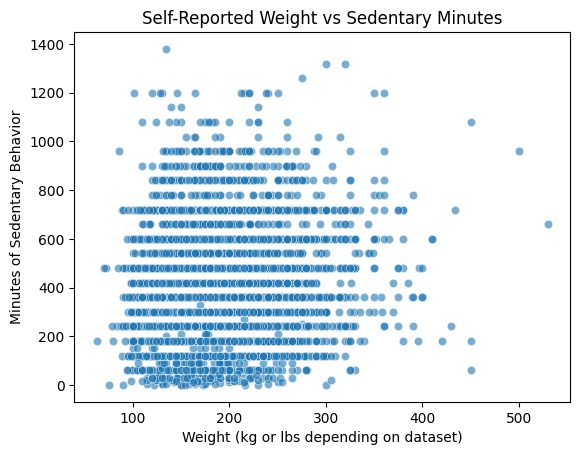

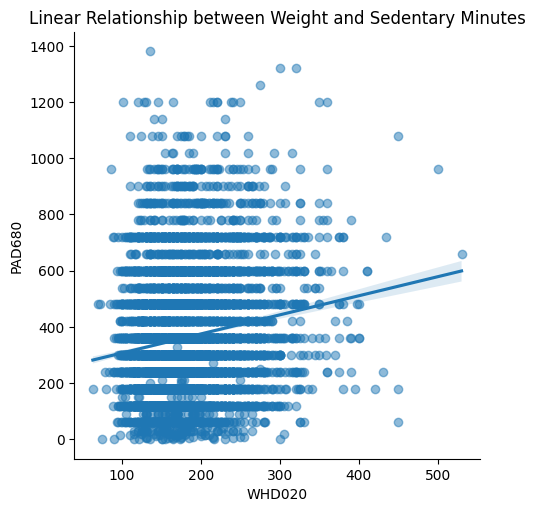

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='WHD020', y='PAD680', data=df_clean, alpha=0.6)
plt.title('Self-Reported Weight vs Sedentary Minutes')
plt.xlabel('Weight (kg or lbs depending on dataset)')
plt.ylabel('Minutes of Sedentary Behavior')
plt.show()

sns.lmplot(x='WHD020', y='PAD680', data=df_clean, scatter_kws={'alpha':0.5})
plt.title('Linear Relationship between Weight and Sedentary Minutes')
plt.show()


As seen from the plot and the regression line, as weight increases, sedentary minutes also tend to increase.

FINAL QUESTION: Is Blood pressure related to Weight?


In [47]:
import pandas as pd

# Load the datasets
weight = pd.read_sas('/content/sample_data/DATA sets/Weight.xpt', format='xport')
bp = pd.read_sas('/content/sample_data/DATA sets/BP.xpt', format='xport')

# Merge on SEQN (participant ID)
df_bp = pd.merge(weight[['SEQN', 'WHD020']],
                 bp[['SEQN', 'BPXOSY3']],
                 on='SEQN', how='inner')

df_bp.head()

,SEQN,WHD020,BPXOSY3
0,130378.0,190.0,132.0
1,130379.0,220.0,113.0
2,130380.0,150.0,104.0
3,130386.0,200.0,115.0
4,130387.0,215.0,145.0


In [48]:
import numpy as np

for c in ['WHD020','BPXOSY3']:
    df_bp.loc[df_bp[c].isin([7777, 9999]), c] = np.nan

df_bp_clean = df_bp.dropna(subset=['WHD020','BPXOSY3'])
df_bp_clean.describe()


,SEQN,WHD020,BPXOSY3
count,6283.000000,6283.000000,6283.000000
mean,136340.489575,179.527773,121.654305
std,3449.540673,47.032022,18.264153
min,130378.000000,63.000000,58.000000
25%,133308.500000,145.000000,109.000000
50%,136385.000000,174.000000,119.000000
75%,139309.500000,205.000000,131.000000
max,142310.000000,530.000000,232.000000


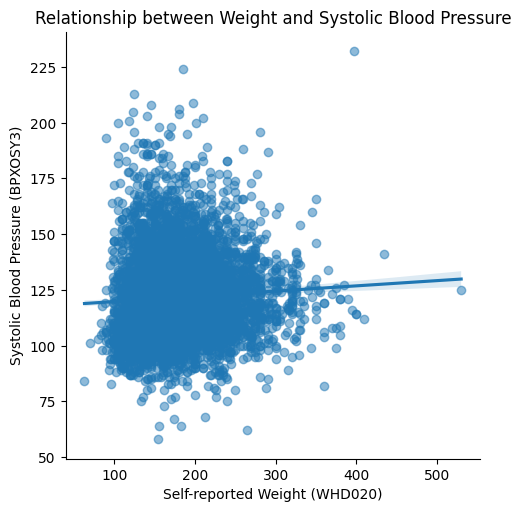

Pearson r = 0.060, p-value = 0.0000


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='WHD020', y='BPXOSY3', data=df_bp_clean, scatter_kws={'alpha':0.5})
plt.title('Relationship between Weight and Systolic Blood Pressure')
plt.xlabel('Self-reported Weight (WHD020)')
plt.ylabel('Systolic Blood Pressure (BPXOSY3)')
plt.show()

print(f"Pearson r = {pearson_r:.3f}, p-value = {pearson_p:.4f}")



The interpretation for this plot presents that there is a slight to none correlation of people with higher weight tend to have slightly higher systolic blood pressure.